In [1]:
# Front matter
import os,datetime
import pandas as pd
import numpy as np
import scipy
from scipy import constants
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import re

# Seaborn, useful for graphics
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

rc = {'lines.linewidth': 1, 
      'axes.labelsize': 20, 
      'axes.titlesize': 20,
      'legend.fontsize': 26,
      'xtick.direction': u'in',
      'ytick.direction': u'in'}
sns.set_style('ticks', rc=rc)

In [2]:
# Import data sets
studylist = []
labelchoice = dict()
phase = dict()
NRIXSdatapath = dict()
XRDdatapath = dict()
colorchoice = dict()
symbol = dict()
symbolsize = dict()

study = 'bccFe'
studylist.append(study)
labelchoice[study] = 'bcc Fe (this study)'
phase[study] = 'bcc'
NRIXSdatapath[study] = '../050_phox_Fe_man/Results/phox_valsFromPDOS.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_bccFe.csv'
colorchoice[study] = 'Gray'
symbol[study] = '^'
symbolsize[study] = 9

study = 'bccFeNi'
studylist.append(study)
labelchoice[study] = 'bcc Fe$_{0.91}$Ni$_{0.09}$ (this study)'
phase[study] = 'bcc'
NRIXSdatapath[study] = '../060_phox_FeNi_man/Results/phox_valsFromPDOS.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_bccFeNi.csv'
colorchoice[study] = 'DarkOrange'
symbol[study] = '^'
symbolsize[study] = 9

study = 'bccFeNiSi'
studylist.append(study)
labelchoice[study] = 'hcp Fe$_{0.80}$Ni$_{0.10}$Si$_{0.10}$ (this study)'
phase[study] = 'bcc'
NRIXSdatapath[study] = '../070_phox_FeNiSi_man/Results/phox_valsFromPDOS.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_bccFeNiSi.csv'
colorchoice[study] = 'DeepSkyBlue'
symbol[study] = '^'
symbolsize[study] = 9

study = 'hcpFe'
studylist.append(study)
labelchoice[study] = 'hcp Fe (Murphy et al.)'
phase[study] = 'hcp'
NRIXSdatapath[study] = '../005_PubNRIXSVals/hcpFe_Murphy.csv'
XRDdatapath[study]   = '../005_PubNRIXSVals/hcpFe_Murphy.csv'
colorchoice[study] = 'Gray'
symbol[study] = 'o'
symbolsize[study] = 8

study = 'hcpFeNi'
studylist.append(study)
labelchoice[study] = 'hcp Fe$_{0.91}$Ni$_{0.09}$ (this study)'
phase[study] = 'hcp'
NRIXSdatapath[study] = '../060_phox_FeNi_man/Results/phox_valsFromPDOS.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_hcpFeNi.csv'
colorchoice[study] = 'DarkOrange'
symbol[study] = 'o'
symbolsize[study] = 8

study = 'hcpFeNiSi'
studylist.append(study)
labelchoice[study] = 'hcp Fe$_{0.80}$Ni$_{0.10}$Si$_{0.10}$ (this study)'
phase[study] = 'hcp'
NRIXSdatapath[study] = '../070_phox_FeNiSi_man/Results/phox_valsFromPDOS.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_hcpFeNiSi.csv'
colorchoice[study] = 'DeepSkyBlue'
symbol[study] = 'o'
symbolsize[study] = 8

In [3]:
precious_dfdict = dict()

for study in studylist:
    print('Now importing '+study)

    # Import XRD data
    init_XRD_df = pd.read_csv(XRDdatapath[study])
    # Change index name to match other data sets
    if 'NRIXS exp' in init_XRD_df:
        init_XRD_df = init_XRD_df.rename(columns={'NRIXS exp': 'Index'})
    # We only need some of the info here
    if phase[study] == 'bcc':
        XRD_df = init_XRD_df[['Index','a','da','V','dV','rho','drho','P','dP']]
    else:
        XRD_df = init_XRD_df[['Index','a','da','c','dc','V','dV','rho','drho','P','dP']]

    # Import NRIXS data
    init_NRIXS_df = pd.read_csv(NRIXSdatapath[study])
    # We're only going to look at some of the values here, b/c only some values are reported in Murphy et al.
    NRIXS_df = init_NRIXS_df[['Index','fLM','dfLM','KE','dKE','MFC','dMFC','cvib','dcvib','Svib','dSvib','TLM','dTLM','IF','dIF','Fvib','dFvib']]
    # Get rows in NRIXS df that also appear in XRD df. (So we only look at bcc or hcp data.)
    NRIXS_df = NRIXS_df[NRIXS_df['Index'].isin(XRD_df['Index'].values)]
    
    # Combine XRD df and NRIXS df into one df to rule them all
    precious_df = pd.merge(XRD_df,NRIXS_df,on='Index')

    precious_dfdict[study] = precious_df

Now importing bccFe
Now importing bccFeNi
Now importing bccFeNiSi
Now importing hcpFe
Now importing hcpFeNi
Now importing hcpFeNiSi


In [4]:
alphaval = 0.6

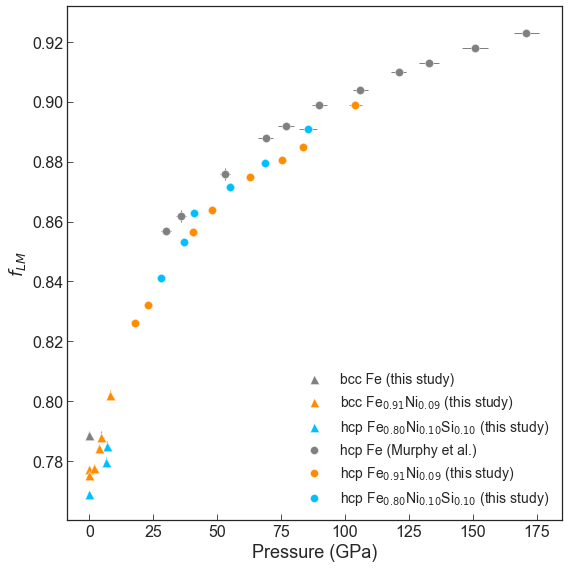

In [5]:
# Lamb-Moessbauer factor figure

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(8, 8))


# Plot bcc Fe
#####################
study = 'bccFe'
df = precious_dfdict[study]

h0, = ax0.plot(df['P'], df['fLM'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['fLM'], xerr=df['dP'], yerr=df['dfLM'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNi
#####################
study = 'bccFeNi'
df = precious_dfdict[study]

h1, = ax0.plot(df['P'], df['fLM'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['fLM'], xerr=df['dP'], yerr=df['dfLM'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNiSi
#####################
study = 'bccFeNiSi'
df = precious_dfdict[study]

h2, = ax0.plot(df['P'], df['fLM'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['fLM'], xerr=df['dP'], yerr=df['dfLM'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp Fe
#####################
study = 'hcpFe'
df = precious_dfdict[study]

h3, = ax0.plot(df['P'], df['fLM'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['fLM'], xerr=df['dP'], yerr=df['dfLM'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNi
#####################
study = 'hcpFeNi'
df = precious_dfdict[study]

h4, = ax0.plot(df['P'], df['fLM'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['fLM'], xerr=df['dP'], yerr=df['dfLM'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNiSi
#####################
study = 'hcpFeNiSi'
df = precious_dfdict[study]

h5, = ax0.plot(df['P'], df['fLM'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['fLM'], xerr=df['dP'], yerr=df['dfLM'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

hlabels = [h0,h1,h2,h3,h4,h5]
ax0.legend(fontsize=14,loc=4,handles = hlabels)

ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$f_{LM}$', fontsize=18)


plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloy_fLM.pdf', format='pdf')

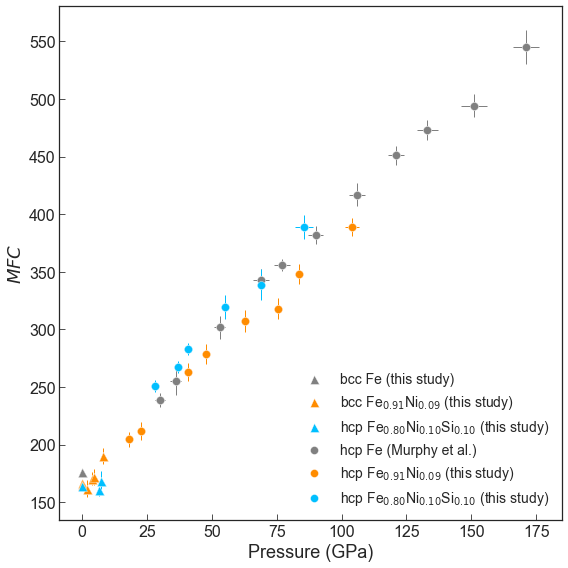

In [6]:
# Mean force constant figure

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(8, 8))


# Plot bcc Fe
#####################
study = 'bccFe'
df = precious_dfdict[study]

h0, = ax0.plot(df['P'], df['MFC'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['MFC'], xerr=df['dP'], yerr=df['dMFC'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNi
#####################
study = 'bccFeNi'
df = precious_dfdict[study]

h1, = ax0.plot(df['P'], df['MFC'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['MFC'], xerr=df['dP'], yerr=df['dMFC'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNiSi
#####################
study = 'bccFeNiSi'
df = precious_dfdict[study]

h2, = ax0.plot(df['P'], df['MFC'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['MFC'], xerr=df['dP'], yerr=df['dMFC'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp Fe
#####################
study = 'hcpFe'
df = precious_dfdict[study]

h3, = ax0.plot(df['P'], df['MFC'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['MFC'], xerr=df['dP'], yerr=df['dMFC'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNi
#####################
study = 'hcpFeNi'
df = precious_dfdict[study]

h4, = ax0.plot(df['P'], df['MFC'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['MFC'], xerr=df['dP'], yerr=df['dMFC'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNiSi
#####################
study = 'hcpFeNiSi'
df = precious_dfdict[study]

h5, = ax0.plot(df['P'], df['MFC'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['MFC'], xerr=df['dP'], yerr=df['dMFC'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

hlabels = [h0,h1,h2,h3,h4,h5]
ax0.legend(fontsize=14,loc=4,handles = hlabels)

ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$MFC$', fontsize=18)


plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloy_MFC.pdf', format='pdf')

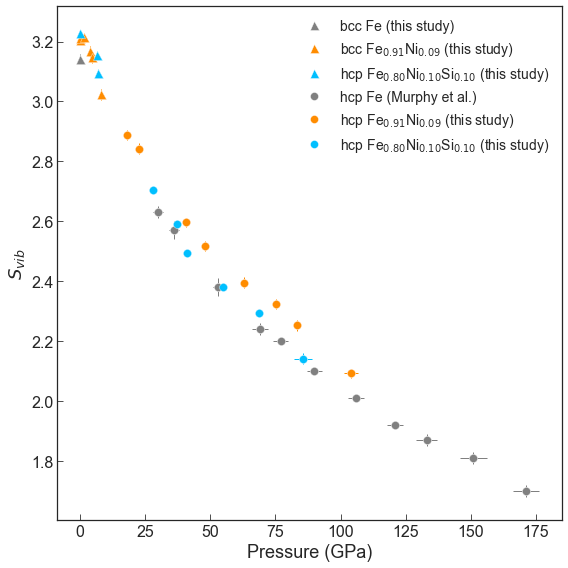

In [7]:
# Vibrational entropy figure

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(8, 8))


# Plot bcc Fe
#####################
study = 'bccFe'
df = precious_dfdict[study]

h0, = ax0.plot(df['P'], df['Svib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Svib'], xerr=df['dP'], yerr=df['dSvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNi
#####################
study = 'bccFeNi'
df = precious_dfdict[study]

h1, = ax0.plot(df['P'], df['Svib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Svib'], xerr=df['dP'], yerr=df['dSvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNiSi
#####################
study = 'bccFeNiSi'
df = precious_dfdict[study]

h2, = ax0.plot(df['P'], df['Svib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Svib'], xerr=df['dP'], yerr=df['dSvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp Fe
#####################
study = 'hcpFe'
df = precious_dfdict[study]

h3, = ax0.plot(df['P'], df['Svib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Svib'], xerr=df['dP'], yerr=df['dSvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNi
#####################
study = 'hcpFeNi'
df = precious_dfdict[study]

h4, = ax0.plot(df['P'], df['Svib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Svib'], xerr=df['dP'], yerr=df['dSvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNiSi
#####################
study = 'hcpFeNiSi'
df = precious_dfdict[study]

h5, = ax0.plot(df['P'], df['Svib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Svib'], xerr=df['dP'], yerr=df['dSvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

hlabels = [h0,h1,h2,h3,h4,h5]
ax0.legend(fontsize=14,loc=1,handles = hlabels)

ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$S_{vib}$', fontsize=18)


plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloy_Svib.pdf', format='pdf')

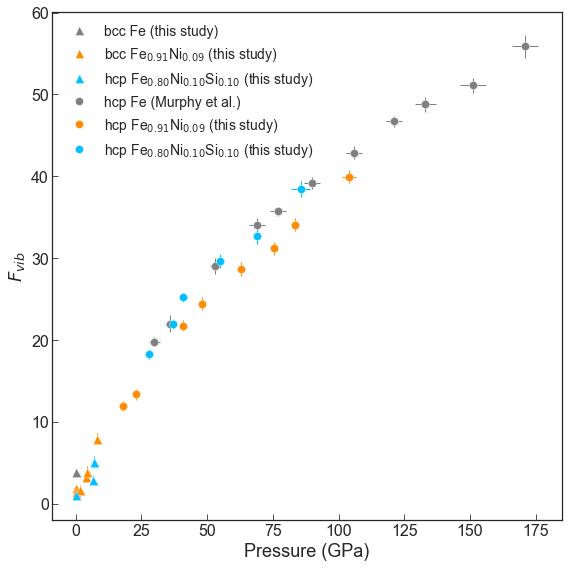

In [8]:
# Vibrational free energy figure

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(8, 8))


# Plot bcc Fe
#####################
study = 'bccFe'
df = precious_dfdict[study]

h0, = ax0.plot(df['P'], df['Fvib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Fvib'], xerr=df['dP'], yerr=df['dFvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNi
#####################
study = 'bccFeNi'
df = precious_dfdict[study]

h1, = ax0.plot(df['P'], df['Fvib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Fvib'], xerr=df['dP'], yerr=df['dFvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot bcc FeNiSi
#####################
study = 'bccFeNiSi'
df = precious_dfdict[study]

h2, = ax0.plot(df['P'], df['Fvib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Fvib'], xerr=df['dP'], yerr=df['dFvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp Fe
#####################
study = 'hcpFe'
df = precious_dfdict[study]

h3, = ax0.plot(df['P'], df['Fvib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Fvib'], xerr=df['dP'], yerr=df['dFvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNi
#####################
study = 'hcpFeNi'
df = precious_dfdict[study]

h4, = ax0.plot(df['P'], df['Fvib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Fvib'], xerr=df['dP'], yerr=df['dFvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

# Plot hcp FeNiSi
#####################
study = 'hcpFeNiSi'
df = precious_dfdict[study]

h5, = ax0.plot(df['P'], df['Fvib'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=colorchoice[study], 
               mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
               label=labelchoice[study],markeredgewidth=0.5,ls='none')

ax0.errorbar(df['P'], df['Fvib'], xerr=df['dP'], yerr=df['dFvib'],
             marker=symbol[study], ms=symbolsize[study], capsize=0, color=colorchoice[study], mfc=colorchoice[study],
             mec=matplotlib.colors.colorConverter.to_rgba('White', alpha=.75),
             label=labelchoice[study],markeredgewidth=0.5,ls='none',elinewidth=1)

hlabels = [h0,h1,h2,h3,h4,h5]
ax0.legend(fontsize=14,loc=2,handles = hlabels)

ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$F_{vib}$', fontsize=18)


plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloy_Fvib.pdf', format='pdf')